# O que é o Apache Spark ?

<div style="text-align: justify">O Apache Spark é um framework de computação unificada e um conjunto de bibliotecas para processamento de dados paralelos em clusters de computadores. Spark é o mecanismo de código aberto mais desenvolvido para essa tarefa, tornando-se uma ferramenta padrão para qualquer desenvolvedor ou cientista de dados interessado em big data. O Spark oferece suporte a várias linguagens de programação amplamente utilizadas (Python, Java, Scala e R), inclui bibliotecas para diversas tarefas, desde SQL a fluxo contínuo e aprendizado de máquina, e é executado em qualquer lugar, desde um laptop até um cluster de milhares de servidores. Isso torna o sistema fácil de iniciar e ampliar para processamento de dados grandes ou incrivelmente grande escala.</div> 

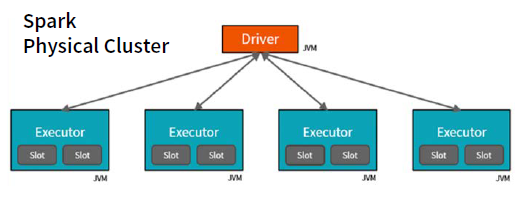

## DataFrames
<br>
<div style="text-align: justify"> Um <b>DataFrame</b> é a API estruturada mais comum e simplesmente representa uma tabela de dados com linhas e colunas. A lista que define as colunas e os tipos dentro dessas colunas é chamada de <i>schema</i>. Você pode pensar em um DataFrame como uma planilha com colunas nomeadas.</div> 

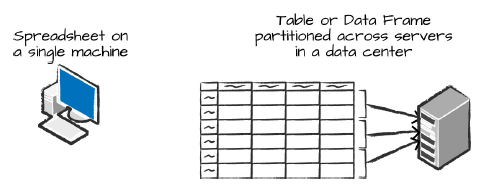
<br>
<center>A figura acima ilustra a diferença fundamental: uma planilha fica em um computador em um local específico, enquanto um Spark DataFrame pode abranger milhares de computadores. A razão para colocar os dados em mais de um computador deve ser intuitiva: ou os dados são muito grandes para caber em uma máquina ou simplesmente levaria muito tempo para executar essa computação em uma máquina.</center>

<div style="text-align: justify">O conceito DataFrame não é exclusivo do Spark. R e Python ambos têm conceitos semelhantes. No entanto, os DataFrames do Python / R (com algumas exceções) existem em uma máquina, e não em várias máquinas. Isso limita o que você pode fazer com um determinado DataFrame aos recursos existentes nessa máquina específica. No entanto, como o Spark tem interfaces de linguagem para Python e R, é muito fácil converter DataFrames Pandas (Python) em DataFrames do Spark e R DataFrames em DataFrames do Spark.<br><br>O Spark possui várias abstrações principais: Datasets, DataFrames, SQL Tables e Resilient Distributed Datasets (RDDs). Todas essas abstrações diferentes representam coleções distribuídas de dados. Os mais fáceis e eficientes são os DataFrames, que estão disponíveis em todos as linguagens.</div>

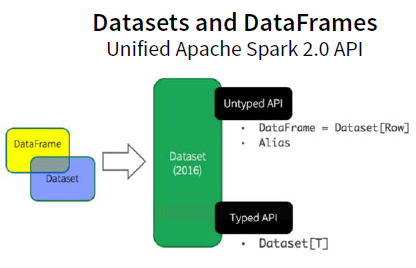

### Partições 
<br>
<div style="text-align: justify">Para permitir que todos os executores executem o trabalho em paralelo, o Spark divide os dados em partes chamadas partições. Uma partição é uma coleção de linhas que estão em uma máquina física em seu cluster. As partições de um DataFrame representam como os dados são distribuídos fisicamente no cluster durante a execução. Se você tiver uma partição, o Spark terá um paralelismo de apenas uma, mesmo que você tenha milhares de executores. Se você tiver muitas partições, mas apenas um executor, o Spark ainda terá um paralelismo de apenas um porque há apenas um recurso de computação. Uma coisa importante a notar é que com DataFrames você não manipula (na maior parte das vezes) partições manualmente ou individualmente. Você simplesmente especifica transformações de dados de alto nível nas partições físicas e o Spark determina como esse trabalho será realmente executado no cluster. APIs de baixo nível existem através da interface RDD.

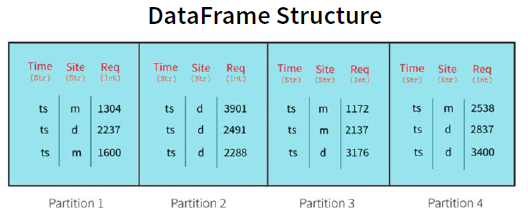

### Transformações
<br>
<div style="text-align: justify">No Spark, as estruturas de dados principais são imutáveis, o que significa que não podem ser alteradas depois de criadas. Isso pode parecer um conceito estranho no início: se você não pode alterá-lo, como você deve usá-lo? Para <i>mudar</i> um DataFrame, você precisa instruir o Spark sobre como você gostaria de modificá-lo para fazer o que quiser. Essas instruções são chamadas de <b>transformações</b>.</div>

In [ ]:
divisBy2 = myRange.where("number % 2 = 0")

<div style="text-align: justify"><b>Transformações</b> são o núcleo de como você expressa sua lógica de negócios usando o Spark. Existem dois tipos de transformações: aquelas que especificam dependências estreitas e aquelas que especificam dependências amplas. Transformações que consistem em <i>dependências estreitas</i> (as chamadas de transformações restritas) são aquelas para as quais cada partição de entrada contribuirá para apenas uma partição de saída. No trecho de código acima, a instrução where especifica uma dependência estreita, em que apenas uma partição contribui para no máximo uma partição de saída, como você pode ver na figura abaixo.</div>

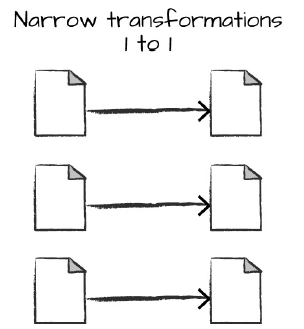  

<div style="text-align: justify">Um estilo de transformação de <b>dependência ampla</b> (ou transformação ampla) terá partições de entrada contribuindo para muitas partições de saída. Você frequentemente ouvirá isso como uma mistura, na qual o Spark trocará as partições pelo cluster. Com transformações restritas, o Spark executará automaticamente uma operação chamada pipelining, o que significa que, se especificarmos vários filtros em DataFrames, todos eles serão executados na memória. O mesmo não pode ser dito para embaralhamentos(shuffles). Quando executamos um shuffle, o Spark grava os resultados no disco. Transformações amplas são ilustradas abaixo.</div>

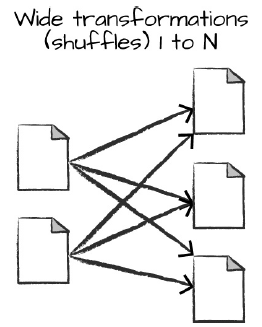

### Lazy Evaluation (Avaliação Preguiçosa)
<br>
<div style="text-align: justify"><b>Lazy Evaluation</b> significa que Spark esperará até o último momento para executar o gráfo de instruções de computação. No Spark, em vez de modificar os dados imediatamente quando você expressa alguma operação, você cria um plano de transformações que gostaria de aplicar aos seus dados de origem. Ao aguardar até o último minuto para executar o código, o Spark compila esse plano a partir das transformações brutas do DataFrame para um plano físico simplificado que será executado da maneira mais eficiente possível em todo o cluster. Isso fornece imensos benefícios, pois o Spark pode otimizar todo o fluxo de dados do final para o fim. Um exemplo disso é algo chamado <i>pushdown</i> de predicado em DataFrames. Se construírmos um grande trabalho do Spark, mas especificarmos um filtro no final que exige apenas que procuremos uma linha de nossos dados de origem, a maneira mais eficiente de executar isso é acessar o único registro de que precisamos. A Spark vai realmente otimizar isso para nós, empurrando o filtro para baixo automaticamente.</div>

### Ações
<br>
<div style="text-align: justify">Transformações nos permitem construir nosso plano de transformação lógica. Para acionar o cálculo, executamos uma ação. Uma ação instrui o Spark a calcular um resultado de uma série de transformações. A ação mais simples é count, o que nos dá o número total de registros no DataFrame:</div>

In [ ]:
divisBy2.count()

<div style="text-align: justify">A saída do código anterior deveria ser 500. Claro, contar não é a única ação. Existem três tipos de ações:</div>

- Ações para visualizar dados no console;
- Ações para coletar dados para objetos nativos no respectivo idioma;
- Ações para gravar em origens de dados de saída.

<div style="text-align: justify">Ao especificar essa ação, iniciamos uma tarefa Spark que executa nossa transformação de filtro (uma transformação restrita), depois uma agregação (uma transformação ampla) que executa as contagens por partição e, em seguida, uma coleta, que leva nosso resultado a um objeto nativo na respectiva linguagem. Você pode ver tudo isso inspecionando a interface do usuário do Spark, uma ferramenta incluída no Spark, com a qual você pode monitorar os trabalhos do Spark em execução em um cluster.</div>

### Spark Apps, Jobs, Stages e Tasks 

Uma anatomia de uma aplicação Spark(___Spark Apps___) geralmente inclui operações Spark, que podem ser transformações ou ações em seus conjuntos de dados usando as APIs RDDs, DataFrames ou Datasets do Spark. Por exemplo, em uma aplicação Spark: 

1. Se você invocar uma ação, como __collect( )__ ou __take( )__ em seu DataFrame ou DataSetO comando de ação criará um trabalho(___job___);
2. Um trabalho(___job___) será então decomposto em estágios(___stages___) únicos ou múltiplos;
3. Os estágios(___stages___) são divididos em tarefas(___tasks___) individuais;
4. As tarefas(___tasks___) são unidades de execução que o escalonador do Driver envia aos Executores do Spark para executar em seu cluster.

Muitas vezes, várias tarefas serão executadas em paralelo no mesmo executor, cada uma processando sua unidade de conjunto de dados particionado em sua memória.

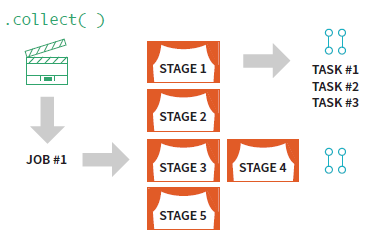
<center>Anatomia de uma aplicação Spark</center> 

Material baseado em exemplos do livro __Spark - The Definitive Guide. Bill Chambers e Matei Zaharia__